In [2]:
## importing Data file
medical_charges_url='https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv' 

from urllib.request import urlretrieve

urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1f50f011950>)

In [3]:
## Now we create DataFrame
import pandas as pd
medical_df = pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Objective
Our goal is to estimate the values in the **`charges`** column using the other available columns.  
If we can do this accurately for the historical data, then we can also estimate charges for new customers simply by asking for information such as their age, sex, BMI, etc.


Let's examine the data type of each column to understand what kind of preprocessing might be required.


In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Initial Analysis
we have Age, BMI, Children, Charges in the form of **INT/FLOAT** and we have Sex, Region, Smoker as **ObJECT/STRING**

In [5]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 
The Ranges of values on the numerical columns seems reasonable too(No Negative Ages), so mot much data cleaning required, there are no nulls as well. The charges column seems skewed, as the Median is much lower that the maximum. 

# Exploratory Analysis and Data Visualization

In [6]:
import plotly.express as px #this is for interactive plots
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

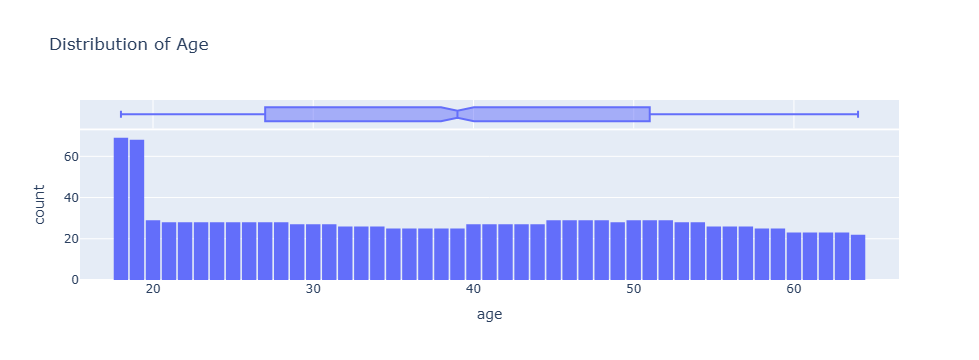

In [10]:
fig = px.histogram(medical_df,
                  x='age',
                  marginal='box',
                  nbins=47,
                  title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

###
The distribution is almost uniform, with 20-30 customers at every age. Except, for 18-19, which have more than twice .

The unusually high count of customers aged 18 and 19 is due to oversampling in the dataset. This synthetic dataset intentionally includes more young adults to ensure adequate representation for modeling purposes, especially since these ages often mark key insurance policy transitions.


# Body Mass Index

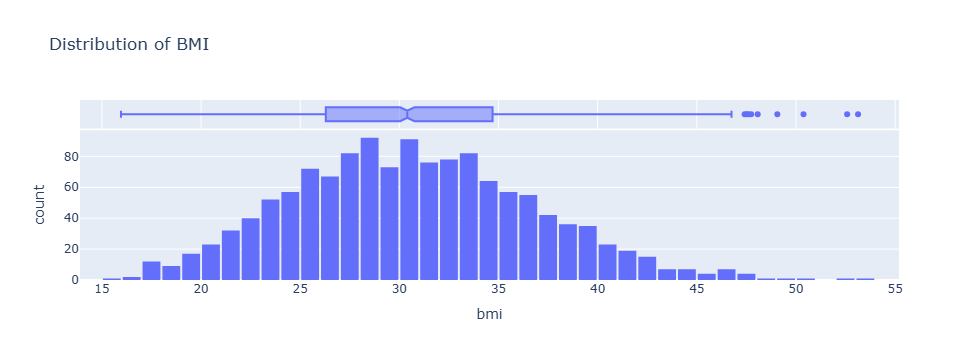

In [11]:
fig = px.histogram(medical_df,
                  x='bmi',
                  marginal='box',
                  title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

###
The BMI distribution is roughly bell-shaped with a slight right skew. Most individuals have a BMI between 26 and 34, with a median around 30. A few outliers exist on both the low and high ends, especially above 47. The highest frequency is observed in the 29–31 range.

 BMI follows a Gaussian (bell-shaped) distribution as it is a biological measure influenced by many small, independent factors, causing most values to cluster around an average with fewer extreme cases.



# Charges

###
Most important column is charges. This is the column we are trying to predict. Lets use smoker column as well to distinguish the charges for smokers and non smokers

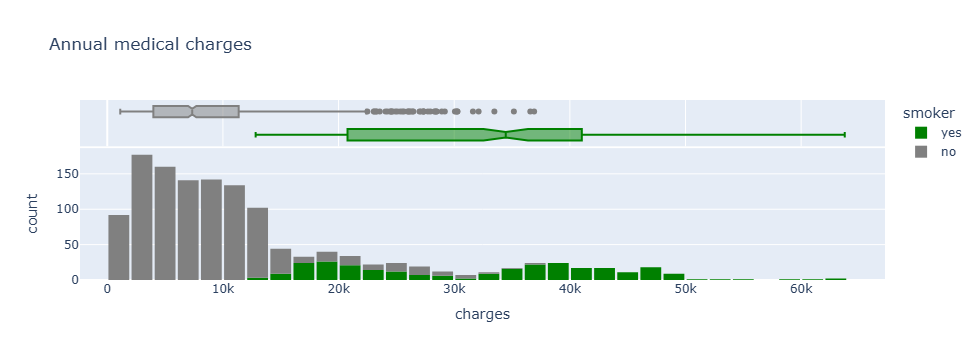

In [12]:
fig = px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  color='smoker',
                  color_discrete_sequence= ['green', 'grey'],
                  title='Annual medical charges')
fig.update_layout(bargap=0.1)
fig.show()

###
Annual medical charges are significantly higher for smokers compared to non-smokers. Most non-smokers have charges below $15,000, while  smokers often incur costs between $20,000–$40,000, with some exceeding $60,000. The median charge for smokers ($35000) is well above that of non-smokers($7300), indicating a strong link between smoking and increased medical expenses.


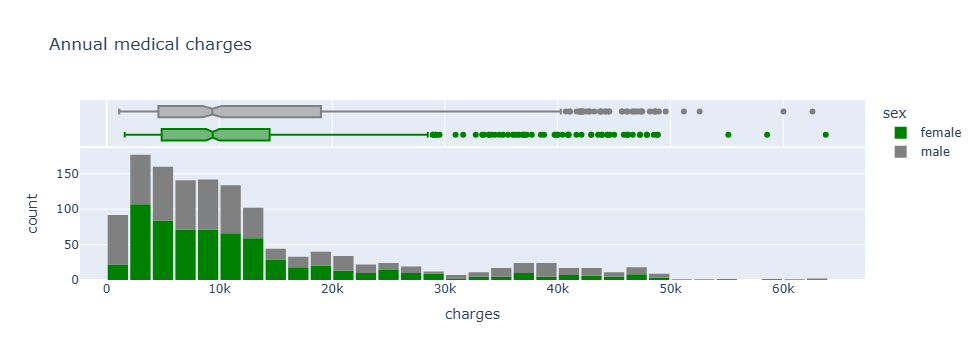

In [14]:
fig = px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  color='sex',
                  color_discrete_sequence=['green','grey'],
                  title='Annual medical charges')
fig.update_layout(bargap=0.1)
fig.show()

###
Annual medical charges show similar patterns for males and females, with most charges below $15,000 and a few extreme cases above $60,000. The medians and spreads are nearly identical, suggesting that sex alone does not strongly influence medical expenses; other factors are likely more significant.



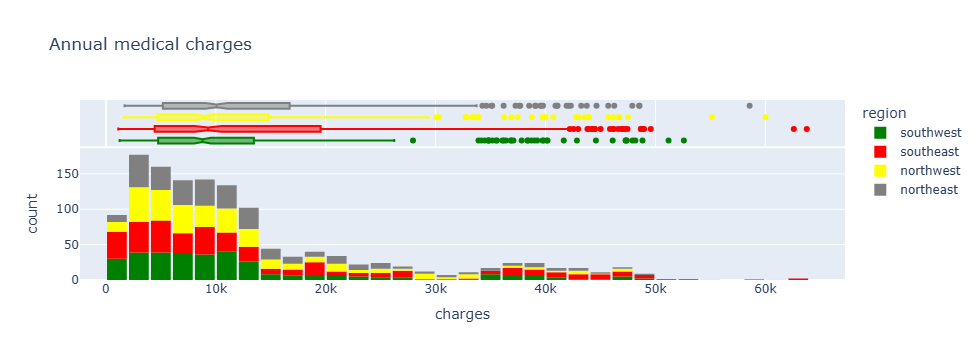

In [16]:
fig = px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  color='region',
                  color_discrete_sequence=['green','red','yellow','grey'],
                  title='Annual medical charges')
fig.update_layout(bargap=0.1)
fig.show()

###
Annual medical charges are broadly similar across all regions, with most costs below $15,000 and high-cost outliers present in each. Median values and spreads are close, suggesting that region alone does not strongly influence expenses, and other factors are likely more important.


## Smokers 
Initial analysis shows a strong relationship between smoking status and annual medical charges, with smokers incurring significantly higher costs. Given this clear separation in distributions, we will prioritize the **smoker** column in our predictive modeling as it is likely to be a key driver of charges.


In [17]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

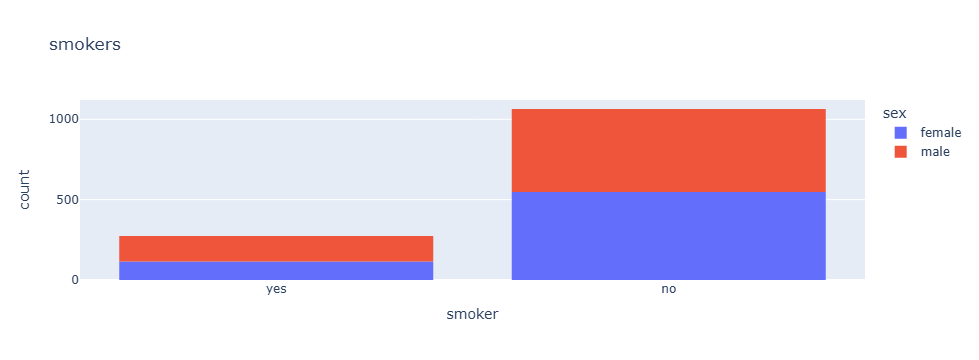

In [19]:
px.histogram(medical_df, x='smoker', color='sex', title='smokers')

> **Note:** Always compare your dataset's distributions with real-world population statistics to ensure accuracy.  
> **Example:** If your data shows 90% smokers but in reality only ~10% of the population smokes, your model will be biased and likely predict most cases as smokers.  
> **Action:** Verify and adjust before analysis to avoid misleading conclusions.


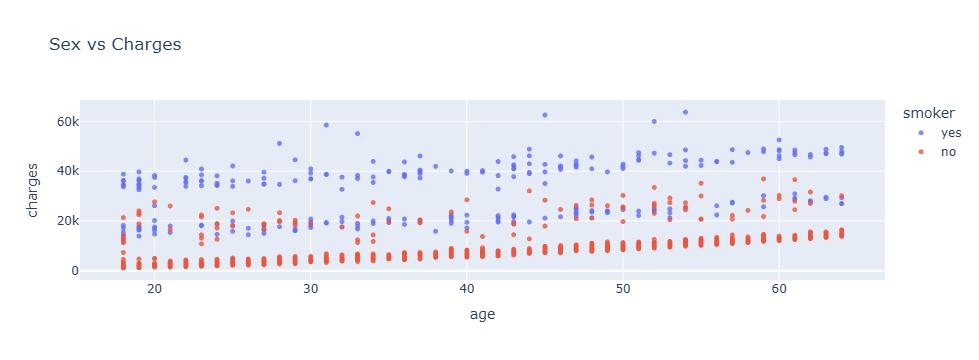

In [23]:
fig = px.scatter(medical_df,
                x='age',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='Sex vs Charges')
fig.update_traces(marker_size=5)
fig.show()

###
We can make the following observations from the above chart:

> The general trend is that medical charges tend to increase with age, as expected. However, there is substantial variation at every age, indicating that age alone cannot accurately predict medical charges.
> The data points appear to form three clusters, each roughly following a line with an upward slope:

1. **Cluster 1 (Largest):** Primarily healthy non-smokers with relatively low medical charges compared to others.
2. **Cluster 2:** A mix of smokers and non-smokers, possibly representing two overlapping groups — non-smokers with medical issues and smokers without major medical issues.
3. **Cluster 3:** Exclusively smokers, likely representing individuals with major medical issues that may be related to or worsened by smoking.

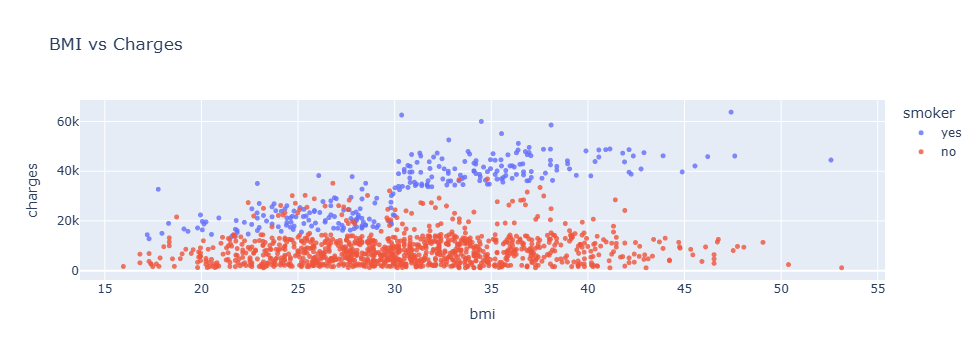

In [24]:
fig = px.scatter(medical_df,
                x='bmi',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title = 'BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

###
We can make the following observations from the above chart:

> There is no clear linear relationship between BMI and medical charges for the population as a whole. However, smoking status creates a distinct separation in charges across all BMI values.
> The data appears to form three noticeable groups:

1. **Cluster 1 (Largest):** Predominantly non-smokers with relatively low medical charges across the full BMI range.
2. **Cluster 2:** A mix of smokers and non-smokers in the mid-range of charges, possibly representing non-smokers with medical issues and smokers without severe health complications.
3. **Cluster 3:** Exclusively smokers with high medical charges, potentially linked to health problems that are caused or worsened by smoking, often seen at higher BMI values.


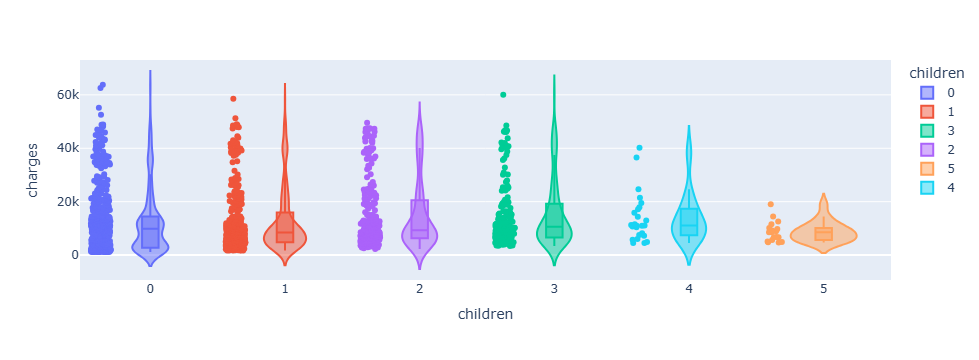

In [34]:
fig = px.violin(
    medical_df,
    x="children",          # category on x-axis
    y="charges",         # numeric variable on y-axis
    color="children",      # color separation by children status
    box=True,            # include inner box plot
    points="all",        # show all individual data points
    hover_data=medical_df.columns # show all columns on hover
)
fig.show()

### Insurance Charges vs. Number of Children: Insights

- **Charges Distribution:** The distribution of insurance charges is wide across all numbers of children, with notable outliers in each group, especially for 0 to 3 children.
- **Medians & Spread:** Most groups (0 to 3 children) have similar median charges and a broad range, including some very high charges (over $60,000).
- **Fewer High Charges for Larger Families:** Households with 4 or 5 children show fewer outliers, and both the median and spread of charges are somewhat lower, possibly reflecting a smaller sample size or different dynamics in these families.
- **No Strong Correlation:** There is no clear trend indicating that insurance charges consistently rise or fall with an increasing number of children.
- **Density:** The highest density of data points is concentrated at lower charge values across all groups.


# Correlation
As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.
 
* * **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

In [40]:
age_charges_corr=medical_df.charges.corr(medical_df.age)
bmi_charges_corr=medical_df.charges.corr(medical_df.bmi)
children_charges_corr=medical_df.charges.corr(medical_df.children)
print("age vs charges correlation :", age_charges_corr)
print("bmi vs charges correlation :", bmi_charges_corr)
print("children vs charges correlation :", children_charges_corr)



age vs charges correlation : 0.29900819333064765
bmi vs charges correlation : 0.19834096883362892
children vs charges correlation : 0.06799822684790487


###
The correlation analysis shows that **age** has the strongest positive correlation with charges (0.30), followed by **BMI** (0.20). The number of **children** has a very weak correlation with charges (0.07). This suggests that while age and BMI have some predictive power, children alone are unlikely to be a strong predictor of medical costs.


In [41]:
smoker_values = {'no':0,'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_charges_corr = medical_df.charges.corr(smoker_numeric)
print("smoker vs charges correlation :", smoker_charges_corr)

smoker vs charges correlation : 0.7872514304984772


###
Smoking status has a very strong positive correlation with charges (0.79), far higher than any other variable in the dataset. This confirms that smoking is a major driver of medical costs and should be a primary focus in the prediction model.


In [45]:
medical_df.corr(numeric_only=True) #In Pandas, the .corr() method calculates pairwise correlation coefficients between the numeric columns of a DataFrame.

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


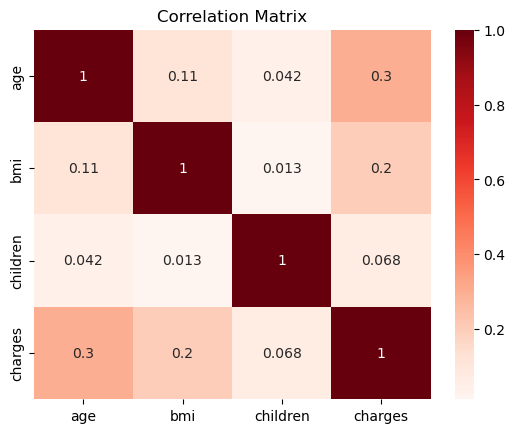

In [48]:
sns.heatmap(medical_df.corr(numeric_only=True), cmap = 'Reds', annot=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

## Correlation Vs Causation Fallacy :
### **Important Note:**  
A high correlation does **not** mean that one feature causes the other. Two features, `X` and `Y`, can be correlated if:  
- **X causes Y**, or  
- **Y causes X**, or  
- **Both are caused by a third factor `Z`**.  

The correlation may disappear if one of these cause-effect relationships is broken. Sometimes, `X` and `Y` simply appear to be correlated because the sample size is too small or the relationship is coincidental.  

While this may seem obvious, computers cannot automatically distinguish between **correlation** and **causation**. Automated systems can only detect patterns, not determine why they exist. This is important because decisions based solely on such systems can have major consequences for society. Determining true cause-effect relationships requires **human insight and careful analysis**.  

**Example:**  
Ice cream sales and drowning rates both rise in the summer. This does **not** mean eating ice cream causes drowning.  
The real cause is a third factor — **hot weather** — which increases both swimming activity and ice cream consumption.  

### From our correlation analysis, we know that the **smoker** and **age** columns have the strongest relationships with **charges**. To start,In the next phase (in a separate notebook) we will focus on **age** as the single predictor, but only for **non-smokers**, to see how well age alone can estimate medical charges in this group. 